## Problem Statement
You are provided with a text corpora of a Digital media news channel in two different languages, namely english and hindi. You are given the task of finding out the most relevant keywords from the text that would best represent the story. These keyword would then be used as tags of the stories.


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os

In [4]:
abhi=pd.read_csv("articles.txt")

In [66]:
abhi.head()

,676946,english,"Fadnavis, Piyush Goyal perform 'bhoomi pujan' of Latur rail coach factory",Unnamed: 3,standard
0,676943,english,Trump freezes $200 mn in Syrian recovery funds...,NaN,standard
1,676946,english,"Fadnavis, Piyush Goyal perform 'bhoomi pujan' ...","<p>Latur (Maharashtra) [India], Apr. 1 (ANI): ...",standard
2,676941,english,Bhagalpur violence: Arijit Shashwat surrenders,"<p>Patna (Bihar) [India], Apr. 1 (ANI): Union ...",standard
3,676941,english,Bhagalpur violence: Arijit Shashwat surrenders,NaN,standard
4,676944,english,Lawyer MPs engaging judge's impeachment barred...,"<p>New Delhi [India], Apr. 1 (ANI): The Bar Co...",standard


## Since first row has became column name we need to do some manipulations.

In [6]:
abhi.tail()

,676946,english,"Fadnavis, Piyush Goyal perform 'bhoomi pujan' of Latur rail coach factory",Unnamed: 3,standard
5643,833054,hindi,"बैंक कर्मी के शर्मनाक बोल, कहा- कठुआ गैंगरेप प...","<p style=\""text-align: justify;\""><strong>नई द...",standard
5644,832978,hindi,ऐसा हमला कोई इंसान नहीं बल्कि कोई दानव ही कर स...,"<p style=\""text-align: justify;\""><strong>वॉशि...",standard
5645,833051,hindi,मथुरा में अवैध रूप से रह रहे 24 बांग्लादेशी सम...,"<p style=\""text-align: justify;\""><strong>मथुर...",standard
5646,832988,hindi,पुष्कर में वीकेंड एंजॉय करने पहुंचीं किश्वर सह...,इन सितारों के साथ खतरों के खिलाड़ी 8 और झलक द...,gallery
5647,833054,hindi,"बैंक कर्मी के शर्मनाक बोल, कहा- कठुआ गैंगरेप प...","<p style=\""text-align: justify;\""><strong>नई द...",standard


In [7]:
abhi.columns

Index(['676946', 'english',
       'Fadnavis, Piyush Goyal perform 'bhoomi pujan' of Latur rail coach factory',
       'Unnamed: 3', 'standard'],
      dtype='object')

In [8]:
data=abhi.rename(columns={"676946":'articleid',"english":"language","Fadnavis, Piyush Goyal perform 'bhoomi pujan' of Latur rail coach factory":
                    "content","Unnamed: 3":"title","standard":"type"})

In [9]:
data.head()

,articleid,language,content,title,type
0,676943,english,Trump freezes $200 mn in Syrian recovery funds...,NaN,standard
1,676946,english,"Fadnavis, Piyush Goyal perform 'bhoomi pujan' ...","<p>Latur (Maharashtra) [India], Apr. 1 (ANI): ...",standard
2,676941,english,Bhagalpur violence: Arijit Shashwat surrenders,"<p>Patna (Bihar) [India], Apr. 1 (ANI): Union ...",standard
3,676941,english,Bhagalpur violence: Arijit Shashwat surrenders,NaN,standard
4,676944,english,Lawyer MPs engaging judge's impeachment barred...,"<p>New Delhi [India], Apr. 1 (ANI): The Bar Co...",standard


In [10]:
feast={"articleid":"676946","language":"english","content":"Fadnavis, Piyush Goyal perform 'bhoomi pujan' of Latur rail coach factory",
       "title":"Unnamed: 3","type":"standard"}

In [11]:
data2=data.append(feast,ignore_index=True)

In [12]:
data2.tail()

,articleid,language,content,title,type
5644,832978,hindi,ऐसा हमला कोई इंसान नहीं बल्कि कोई दानव ही कर स...,"<p style=\""text-align: justify;\""><strong>वॉशि...",standard
5645,833051,hindi,मथुरा में अवैध रूप से रह रहे 24 बांग्लादेशी सम...,"<p style=\""text-align: justify;\""><strong>मथुर...",standard
5646,832988,hindi,पुष्कर में वीकेंड एंजॉय करने पहुंचीं किश्वर सह...,इन सितारों के साथ खतरों के खिलाड़ी 8 और झलक द...,gallery
5647,833054,hindi,"बैंक कर्मी के शर्मनाक बोल, कहा- कठुआ गैंगरेप प...","<p style=\""text-align: justify;\""><strong>नई द...",standard
5648,676946,english,"Fadnavis, Piyush Goyal perform 'bhoomi pujan' ...",Unnamed: 3,standard


In [13]:
data2['word_count'] = data2['content'].apply(lambda x: len(str(x).split(" ")))
data2[['content','word_count']].head()

,content,word_count
0,Trump freezes $200 mn in Syrian recovery funds...,10
1,"Fadnavis, Piyush Goyal perform 'bhoomi pujan' ...",11
2,Bhagalpur violence: Arijit Shashwat surrenders,5
3,Bhagalpur violence: Arijit Shashwat surrenders,5
4,Lawyer MPs engaging judge's impeachment barred...,10


In [14]:
data2.word_count.describe()

count    5649.000000
mean       12.795893
std         3.853590
min         3.000000
25%        10.000000
50%        13.000000
75%        15.000000
max        29.000000
Name: word_count, dtype: float64

In [15]:
#Identify common words
freq = pd.Series(' '.join(data2['content']).split()).value_counts()[:20]
freq

के        1523
में       1240
की        1121
ने         961
in         835
का         755
to         752
को         727
से         635
पर         633
of         576
for        323
उन्नाव     308
और         297
Unnao      291
है         290
on         281
CWG        260
BJP        240
2018:      239
dtype: int64

In [16]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data2 
         ['content']).split()).value_counts()[-20:]
freq1

बर्बाद,      1
सूत्र        1
ओवरईटिंग     1
ढूंढ         1
नुकसान,      1
लेता         1
निगरानी      1
अरुण         1
कैफ          1
मगर          1
निवेश        1
‘उपहास’      1
Trailer:     1
डरता         1
सीजफायर      1
VW           1
चंद्रबाबू    1
बचाओ,        1
आलोचना       1
शर्त         1
dtype: int64

In [17]:
# Lematizer is more of a advance technique where we get from the root word.Here i took an example
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "perfectly"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: perfectli
lemmatization: perfectly


In [18]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [19]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [20]:
corpus = []
for i in range(0, 5649):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data2['content'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [21]:
corpus[5648]

'fadnavis piyush goyal perform bhoomi pujan latur rail coach factory'

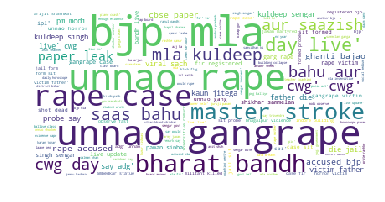

In [27]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=150,
                          max_font_size=50, 
                          random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [29]:
list(cv.vocabulary_.keys())[:10]

['trump',
 'freeze',
 'mn',
 'syrian',
 'recovery',
 'fund',
 'suggesting',
 'exit',
 'trump freeze',
 'freeze mn']

## Most frequently occuring words

[Text(0, 0, 'unnao'),
 Text(0, 0, 'rape'),
 Text(0, 0, 'cwg'),
 Text(0, 0, 'case'),
 Text(0, 0, 'bjp'),
 Text(0, 0, 'mla'),
 Text(0, 0, 'live'),
 Text(0, 0, 'say'),
 Text(0, 0, 'day'),
 Text(0, 0, 'victim'),
 Text(0, 0, 'sengar'),
 Text(0, 0, 'india'),
 Text(0, 0, 'singh'),
 Text(0, 0, 'sit'),
 Text(0, 0, 'ipl'),
 Text(0, 0, 'kuldeep'),
 Text(0, 0, 'pm'),
 Text(0, 0, 'gangrape'),
 Text(0, 0, 'protest'),
 Text(0, 0, 'accused')]

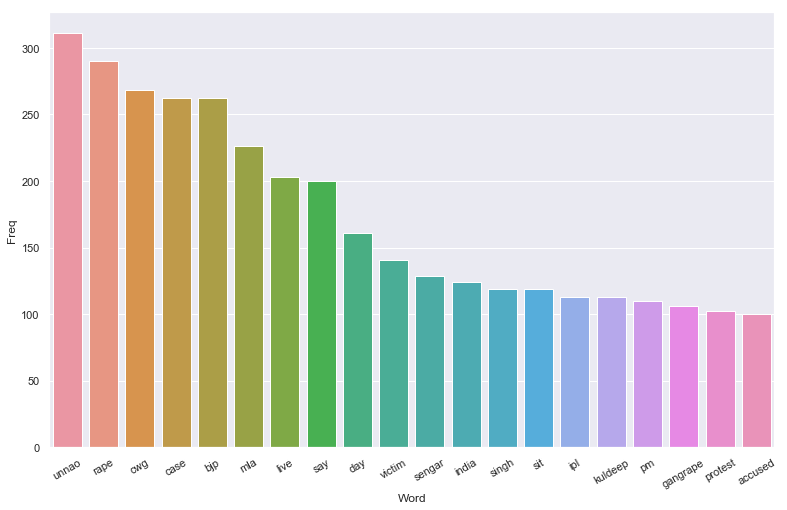

In [31]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

## most frequently occuring bigrams-

           Bi-gram  Freq
0          bjp mla   154
1        rape case   122
2       unnao rape   108
3   unnao gangrape   104
4     bharat bandh    98
5    master stroke    82
6         day live    78
7      mla kuldeep    73
8        saas bahu    70
9         bahu aur    70
10     aur saazish    70
11         cwg day    70
12   victim father    67
13      paper leak    64
14  kuldeep sengar    60
15     accused bjp    56
16      cbse paper    55
17    ghanti bajao    55
18    rape accused    52
19         pm modi    50


[Text(0, 0, 'bjp mla'),
 Text(0, 0, 'rape case'),
 Text(0, 0, 'unnao rape'),
 Text(0, 0, 'unnao gangrape'),
 Text(0, 0, 'bharat bandh'),
 Text(0, 0, 'master stroke'),
 Text(0, 0, 'day live'),
 Text(0, 0, 'mla kuldeep'),
 Text(0, 0, 'saas bahu'),
 Text(0, 0, 'bahu aur'),
 Text(0, 0, 'aur saazish'),
 Text(0, 0, 'cwg day'),
 Text(0, 0, 'victim father'),
 Text(0, 0, 'paper leak'),
 Text(0, 0, 'kuldeep sengar'),
 Text(0, 0, 'accused bjp'),
 Text(0, 0, 'cbse paper'),
 Text(0, 0, 'ghanti bajao'),
 Text(0, 0, 'rape accused'),
 Text(0, 0, 'pm modi')]

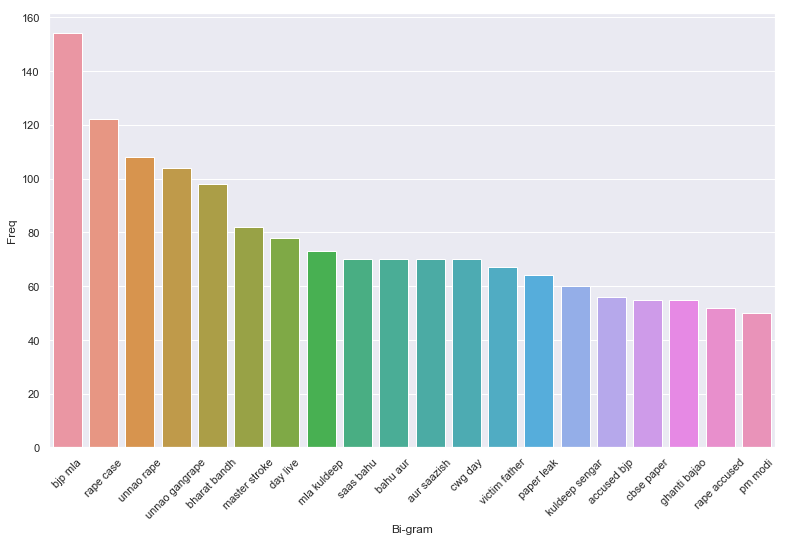

In [33]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)


## Most frequently occuring Tri-grams

                 Tri-gram  Freq
0         bjp mla kuldeep    73
1           saas bahu aur    70
2        bahu aur saazish    70
3         unnao rape case    70
4            cwg day live    70
5         accused bjp mla    56
6         cbse paper leak    55
7        rape accused bjp    44
8       victim father die    43
9         father die jail    43
10   kuldeep singh sengar    41
11          probe say adg    39
12      mla kuldeep singh    37
13    unnao gangrape case    34
14      bharat bandh live    32
15      bandh live update    32
16     mla kuldeep sengar    32
17  unnao gangrape victim    28
18        unnao gang rape    26
19         gang rape case    26


[Text(0, 0, 'bjp mla kuldeep'),
 Text(0, 0, 'saas bahu aur'),
 Text(0, 0, 'bahu aur saazish'),
 Text(0, 0, 'unnao rape case'),
 Text(0, 0, 'cwg day live'),
 Text(0, 0, 'accused bjp mla'),
 Text(0, 0, 'cbse paper leak'),
 Text(0, 0, 'rape accused bjp'),
 Text(0, 0, 'victim father die'),
 Text(0, 0, 'father die jail'),
 Text(0, 0, 'kuldeep singh sengar'),
 Text(0, 0, 'probe say adg'),
 Text(0, 0, 'mla kuldeep singh'),
 Text(0, 0, 'unnao gangrape case'),
 Text(0, 0, 'bharat bandh live'),
 Text(0, 0, 'bandh live update'),
 Text(0, 0, 'mla kuldeep sengar'),
 Text(0, 0, 'unnao gangrape victim'),
 Text(0, 0, 'unnao gang rape'),
 Text(0, 0, 'gang rape case')]

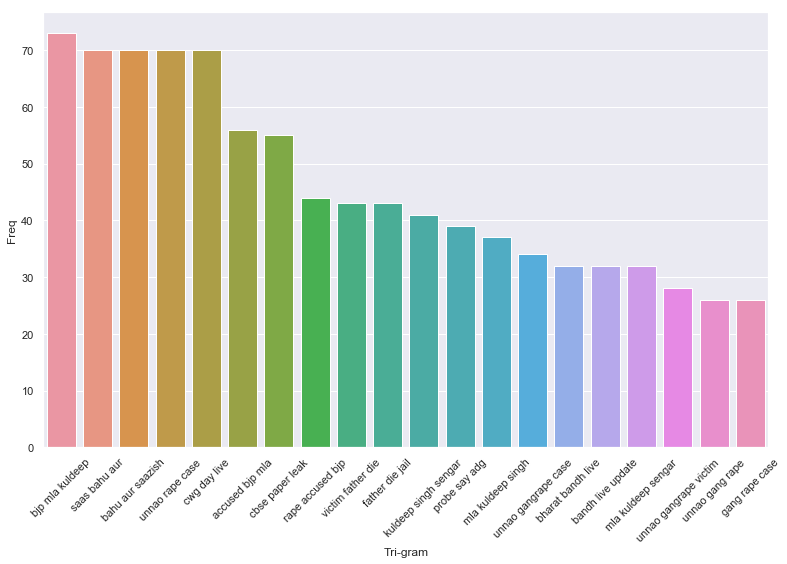

In [34]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)


In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [40]:
corpus[532]

'jammu kashmir terrorist shot dead shopian anantnag'

In [38]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [41]:
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,3)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])



Abstract:
jammu kashmir terrorist shot dead shopian anantnag

Keywords:
shot dead shopian 0.261
shopian anantnag 0.261
dead shopian anantnag 0.261


## Now using the loop for finding the best keyword for individual rows.

In [67]:
f={}
for i in range(0,5649):
    doc=corpus[i]
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    keywords=extract_topn_from_vector(feature_names,sorted_items,4)
    print("\nRow no.:",i,"\nContent:")
    print(doc)
    print("\nKeywords:")
    for k in keywords:
        print(k,keywords[k])
    


Row no.: 0 
Content:
trump freeze mn syrian recovery fund suggesting exit

Keywords:
trump freeze mn 0.224
trump freeze 0.224
syrian recovery fund 0.224
syrian recovery 0.224

Row no.: 1 
Content:
fadnavis piyush goyal perform bhoomi pujan latur rail coach factory

Keywords:
rail coach factory 0.196
rail coach 0.196
pujan latur rail 0.196
pujan latur 0.196

Row no.: 2 
Content:
bhagalpur violence arijit shashwat surrender

Keywords:
violence arijit shashwat 0.304
violence arijit 0.304
shashwat surrender 0.304
bhagalpur violence arijit 0.304

Row no.: 3 
Content:
bhagalpur violence arijit shashwat surrender

Keywords:
violence arijit shashwat 0.304
violence arijit 0.304
shashwat surrender 0.304
bhagalpur violence arijit 0.304

Row no.: 4 
Content:
lawyer mp engaging judge impeachment barred practice court

Keywords:
practice court 0.225
practice 0.225
mp engaging judge 0.225
mp engaging 0.225

Row no.: 5 
Content:
gaza protest netanyahu heap praise israeli military

Keywords:
protest n


Row no.: 57 
Content:
chennai integral coach factory record high build coach

Keywords:
coach 0.391
record high build 0.217
record high 0.217
record 0.217

Row no.: 58 
Content:
nation ring easter carol hymn

Keywords:
ring easter carol 0.289
ring easter 0.289
ring 0.289
nation ring easter 0.289

Row no.: 59 
Content:
stephen hawking funeral held eddie redmayne give reading

Keywords:
stephen hawking funeral 0.222
stephen hawking 0.222
stephen 0.222
redmayne give reading 0.222

Row no.: 60 
Content:
flying squad static surveillance team deployed poll bound k taka

Keywords:
team deployed poll 0.211
team deployed 0.211
surveillance team deployed 0.211
surveillance team 0.211

Row no.: 61 
Content:
arijit shashwat arrested claim police

Keywords:
shashwat arrested claim 0.328
claim police 0.328
arrested claim police 0.328
arrested claim 0.328

Row no.: 62 
Content:
chennai integral coach factory record high build coach

Keywords:
coach 0.391
record high build 0.217
record high 0.217
rec

Row no.: 119 
Content:
hyderabad infant dy operation

Keywords:
infant dy operation 0.351
infant dy 0.351
infant 0.351
hyderabad infant dy 0.351

Row no.: 120 
Content:
way fence progress neurodegenerative disease

Keywords:
way fence progress 0.297
way fence 0.297
progress neurodegenerative disease 0.297
progress neurodegenerative 0.297

Row no.: 121 
Content:
watch full saas bahu aur saazish april st

Keywords:
watch full saas 0.269
saazish april st 0.269
saazish april 0.269
full saas bahu 0.269

Row no.: 122 
Content:
army jawan lost life encounter shopian sp vaid dgp j k

Keywords:
vaid dgp 0.223
sp vaid dgp 0.223
shopian sp vaid 0.223
shopian sp 0.223

Row no.: 123 
Content:
way fence progress neurodegenerative disease

Keywords:
way fence progress 0.297
way fence 0.297
progress neurodegenerative disease 0.297
progress neurodegenerative 0.297

Row no.: 124 
Content:
police custody three taken delhi police joint cp crime branch cbse paper leak case

Keywords:
police 0.239
three tak


Row no.: 183 
Content:
merger episode jeet gayi toh piya morey aapke aa jane se

Keywords:
piya morey aapke 0.194
morey aapke aa 0.194
morey aapke 0.194
merger episode jeet 0.194

Row no.: 184 
Content:
platform making easier embrace pre owned luxury product

Keywords:
product 0.222
pre owned luxury 0.222
pre owned 0.222
platform making easier 0.222

Row no.: 185 
Content:
j k militant killed jawan martyred anti terror operation

Keywords:
terror operation 0.258
militant killed jawan 0.258
martyred anti terror 0.258
martyred anti 0.258

Row no.: 186 
Content:
merger episode jeet gayi toh piya morey aapke aa jane se

Keywords:
piya morey aapke 0.194
morey aapke aa 0.194
morey aapke 0.194
merger episode jeet 0.194

Row no.: 187 
Content:
cbse paper leak accused sent day police custody

Keywords:
paper leak accused 0.251
leak accused sent 0.251
leak accused 0.251
day police custody 0.251

Row no.: 188 
Content:
j k militant killed jawan martyred anti terror operation

Keywords:
terror op

Row no.: 237 
Content:
bcci monitor workload top indian player ipl

Keywords:
workload top indian 0.248
workload top 0.248
workload 0.248
top indian player 0.248

Row no.: 238 
Content:
sachi ghatna inside story indore building collapse

Keywords:
story indore building 0.261
story indore 0.261
sachi ghatna inside 0.261
inside story indore 0.261

Row no.: 239 
Content:
steyn reveals comeback plan likely join hampshire

Keywords:
steyn reveals comeback 0.243
steyn reveals 0.243
steyn 0.243
reveals comeback plan 0.243

Row no.: 240 
Content:
kaun jitega vk singh leaf iraq bring back body indian

Keywords:
vk singh leaf 0.214
singh leaf iraq 0.214
singh leaf 0.214
leaf iraq bring 0.214

Row no.: 241 
Content:
kaun jitega militant terrified operation kashmir

Keywords:
terrified operation kashmir 0.284
terrified operation 0.284
terrified 0.284
operation kashmir 0.284

Row no.: 242 
Content:
sc st atrocity act bharat bandh called monday internet bus suspended punjab

Keywords:
suspended punj


Row no.: 293 
Content:
mortal remains indian killed iraq reach india tomorrow

Keywords:
reach india tomorrow 0.242
india tomorrow 0.242
remains indian killed 0.232
remains indian 0.232

Row no.: 294 
Content:
allow mortal remains iraq victim reach native safely punjab cm

Keywords:
victim reach native 0.203
victim reach 0.203
safely punjab cm 0.203
safely punjab 0.203

Row no.: 295 
Content:
mortal remains indian killed iraq reach india today

Keywords:
remains indian killed 0.249
remains indian 0.249
reach india 0.249
mortal remains indian 0.249

Row no.: 296 
Content:
cbse paper leak board suspends official lax supervision

Keywords:
suspends official lax 0.24
suspends official 0.24
suspends 0.24
supervision 0.24

Row no.: 297 
Content:
cbse paper leak tale friendship gone awry

Keywords:
tale friendship gone 0.261
tale friendship 0.261
tale 0.261
paper leak tale 0.261

Row no.: 298 
Content:
cbse paper leak board suspends official lax supervision

Keywords:
suspends official lax 0


Row no.: 342 
Content:
bhagalpur violence case arjit chaubey surrender amid jai shri ram slogan

Keywords:
violence case arjit 0.192
violence case 0.192
surrender amid jai 0.192
surrender amid 0.192

Row no.: 343 
Content:
j k encounter security force terrorist take place shopian

Keywords:
terrorist take place 0.255
terrorist take 0.255
take place shopian 0.255
place shopian 0.255

Row no.: 344 
Content:
jammu kashmir terrorist shot dead arrested anantnag

Keywords:
shot dead arrested 0.277
dead arrested anantnag 0.277
dead arrested 0.277
arrested anantnag 0.277

Row no.: 345 
Content:
vyakti vishesh full kim jong un dictator lead third world war

Keywords:
world war 0.19
war 0.19
vyakti vishesh full 0.19
vyakti vishesh 0.19

Row no.: 346 
Content:
madhya pradesh die many feared stuck debris hotel building collapse

Keywords:
stuck debris hotel 0.203
stuck debris 0.203
pradesh die many 0.203
pradesh die 0.203

Row no.: 347 
Content:
jammu kashmir terrorist shot dead arrested anantnag


Row no.: 430 
Content:
pradhan urge people work development odisha

Keywords:
work development odisha 0.268
work development 0.268
urge people work 0.268
urge people 0.268

Row no.: 431 
Content:
delhi nct shift cleaner b petrol diesel today

Keywords:
shift cleaner petrol 0.247
shift cleaner 0.247
shift 0.247
petrol diesel today 0.247

Row no.: 432 
Content:
pradhan urge people work development odisha

Keywords:
work development odisha 0.268
work development 0.268
urge people work 0.268
urge people 0.268

Row no.: 433 
Content:
j k seven terrorist gunned dargad encounter

Keywords:
terrorist gunned dargad 0.312
seven terrorist gunned 0.312
seven terrorist 0.312
gunned dargad encounter 0.312

Row no.: 434 
Content:
pradhan urge people work development odisha

Keywords:
work development odisha 0.268
work development 0.268
urge people work 0.268
urge people 0.268

Row no.: 435 
Content:
pradhan urge people work development odisha

Keywords:
work development odisha 0.268
work development

Row no.: 485 
Content:
cauvery issue dmk observe shutdown across tn

Keywords:
shutdown across tn 0.248
shutdown across 0.248
shutdown 0.248
observe shutdown across 0.248

Row no.: 486 
Content:
uttarakhand shikhar sammelan bjp govt good nothing come work say harish rawat

Keywords:
work say harish 0.193
work say 0.193
say harish rawat 0.193
say harish 0.193

Row no.: 487 
Content:
rahul gandhi go low level politics tweet insensitive anil baluni

Keywords:
tweet insensitive anil 0.202
tweet insensitive 0.202
rahul gandhi go 0.202
politics tweet insensitive 0.202

Row no.: 488 
Content:
limited edition doughnut themed running shoe

Keywords:
themed running shoe 0.263
themed running 0.263
themed 0.263
running shoe 0.263

Row no.: 489 
Content:
cauvery issue dmk observe shutdown across tn

Keywords:
shutdown across tn 0.248
shutdown across 0.248
shutdown 0.248
observe shutdown across 0.248

Row no.: 490 
Content:
uttarakhand shikhar sammelan bjp work disappointing say pradeep tamta

Keywo


Row no.: 533 
Content:
david warner wife blame self ball tampering row

Keywords:
wife blame self 0.223
wife blame 0.223
warner wife blame 0.223
warner wife 0.223

Row no.: 534 
Content:
uttarakhand shikhar sammelan kishore upadhyaya v ajay bhatt

Keywords:
upadhyaya ajay bhatt 0.253
upadhyaya ajay 0.253
upadhyaya 0.253
shikhar sammelan kishore 0.253

Row no.: 535 
Content:
korea support latest un sanction n korea

Keywords:
korea 0.45
un sanction korea 0.256
un sanction 0.256
support latest un 0.256

Row no.: 536 
Content:
pak undermine inexperienced windies sarfraz ahmed

Keywords:
windies sarfraz ahmed 0.262
windies sarfraz 0.262
windies 0.262
undermine inexperienced windies 0.262

Row no.: 537 
Content:
uttarakhand shikhar sammelan kishore upadhyaya v ajay bhatt

Keywords:
upadhyaya ajay bhatt 0.253
upadhyaya ajay 0.253
upadhyaya 0.253
shikhar sammelan kishore 0.253

Row no.: 538 
Content:
menopausal therapy user end le fat abdomen

Keywords:
user end le 0.236
user end 0.236
thera


Row no.: 646 
Content:
watch salman khan spend time child mumbai

Keywords:
watch salman khan 0.255
watch salman 0.255
time child mumbai 0.255
time child 0.255

Row no.: 647 
Content:
pak army mastered art non coup coup haqqani

Keywords:
coup 0.428
pak army mastered 0.214
pak army 0.214
non coup coup 0.214

Row no.: 648 
Content:
kangra child died injured school bus fall ditch

Keywords:
school bus fall 0.227
school bus 0.227
kangra child died 0.227
kangra child 0.227

Row no.: 649 
Content:
ghanti bajao china try take india finger number time

Keywords:
try take india 0.222
try take 0.222
take india finger 0.222
take india 0.222

Row no.: 650 
Content:
fbi conduct raid trump lawyer office

Keywords:
fbi conduct raid 0.28
fbi conduct 0.28
conduct raid trump 0.28
conduct raid 0.28

Row no.: 651 
Content:
bharat bandh live update protest taking place different district bihar

Keywords:
update protest taking 0.214
update protest 0.214
taking place different 0.214
taking place 0.214

Row


Row no.: 701 
Content:
saas bahu aur saazish amitabh bachchan latest shoot go viral social medium

Keywords:
viral social medium 0.197
viral social 0.197
shoot go viral 0.197
shoot go 0.197

Row no.: 702 
Content:
preeti simoes reacts kapil sharma current condition

Keywords:
simoes reacts kapil 0.243
simoes reacts 0.243
simoes 0.243
sharma current condition 0.243

Row no.: 703 
Content:
saas bahu aur saazish amitabh bachchan latest shoot go viral social medium

Keywords:
viral social medium 0.197
viral social 0.197
shoot go viral 0.197
shoot go 0.197

Row no.: 704 
Content:
saas bahu aur saazish nakuul mehta learn sword fighting vacation japan

Keywords:
vacation japan 0.2
sword fighting vacation 0.2
sword fighting 0.2
sword 0.2

Row no.: 705 
Content:
mistake sorry say zuckerberg

Keywords:
sorry say zuckerberg 0.372
sorry say 0.372
say zuckerberg 0.372
mistake sorry say 0.372

Row no.: 706 
Content:
preeti simoes reacts kapil sharma current condition

Keywords:
simoes reacts kapil 


Row no.: 764 
Content:
jiji maa suyash find falguni burried ground

Keywords:
suyash find falguni 0.242
suyash find 0.242
suyash 0.242
maa suyash find 0.242

Row no.: 765 
Content:
pm narendra modi observe day long fast april parliament disruption

Keywords:
narendra modi observe 0.237
modi observe day 0.237
long fast april 0.237
long fast 0.237

Row no.: 766 
Content:
pm modi observe fast thursday protest parliament washout

Keywords:
washout 0.243
thursday protest parliament 0.243
thursday protest 0.243
thursday 0.243

Row no.: 767 
Content:
unnao rape case sit inquire murder case victim father

Keywords:
case 0.273
sit inquire murder 0.234
sit inquire 0.234
murder case victim 0.234

Row no.: 768 
Content:
yeh rishta kya kehlata hai subham get engaged luteri dulhan suhana

Keywords:
subham get engaged 0.195
subham get 0.195
subham 0.195
luteri dulhan suhana 0.195

Row no.: 769 
Content:
unnao rape case sit inquire murder case victim father

Keywords:
case 0.273
sit inquire murder 0.


Row no.: 852 
Content:
passenger swatting mosquito jet airway flight

Keywords:
swatting mosquito jet 0.268
swatting mosquito 0.268
swatting 0.268
passenger swatting mosquito 0.268

Row no.: 853 
Content:
ipl chennai super king take kolkata knight rider home ground chepauk

Keywords:
take kolkata knight 0.19
take kolkata 0.19
super king take 0.19
super king 0.19

Row no.: 854 
Content:
kawasaki ninja fact need know

Keywords:
ninja fact need 0.297
ninja fact 0.297
ninja 0.297
need know 0.297

Row no.: 855 
Content:
ipl chennai super king take kolkata knight rider home ground chepauk

Keywords:
take kolkata knight 0.19
take kolkata 0.19
super king take 0.19
super king 0.19

Row no.: 856 
Content:
ever wonder richest political party india

Keywords:
wonder richest political 0.329
wonder richest 0.329
wonder 0.329
richest political party 0.296

Row no.: 857 
Content:
bjp mp castigates siddaramaiah ignoring late kargil hero

Keywords:
siddaramaiah ignoring late 0.226
siddaramaiah ignoring

Row no.: 909 
Content:
aasa organises th bohagi utsav

Keywords:
utsav 0.295
th bohagi utsav 0.295
th bohagi 0.295
organises th bohagi 0.295

Row no.: 910 
Content:
mulayam back son akhilesh decision hail sp bsp alliance

Keywords:
sp bsp alliance 0.221
son akhilesh decision 0.221
son akhilesh 0.221
mulayam back son 0.221

Row no.: 911 
Content:
aaj ka arjun aaj ka arjun pm narendra modi address champaran step towards mission

Keywords:
ka arjun 0.269
ka 0.269
arjun 0.269
aaj ka arjun 0.269

Row no.: 912 
Content:
mulayam back son akhilesh decision hail sp bsp alliance

Keywords:
sp bsp alliance 0.221
son akhilesh decision 0.221
son akhilesh 0.221
mulayam back son 0.221

Row no.: 913 
Content:
aaj ka arjun aaj ka arjun pm narendra modi address champaran step towards mission

Keywords:
ka arjun 0.269
ka 0.269
arjun 0.269
aaj ka arjun 0.269

Row no.: 914 
Content:
centre excluding opposition lokpal selection process kharge

Keywords:
selection process kharge 0.241
selection process 0.241

Row no.: 1006 
Content:
congress term pm modi decision hold fast farce

Keywords:
term pm modi 0.238
term pm 0.238
term 0.238
pm modi decision 0.238

Row no.: 1007 
Content:
trump call south america visit

Keywords:
trump call south 0.31
trump call 0.31
south america visit 0.31
south america 0.31

Row no.: 1008 
Content:
trump call south america visit

Keywords:
trump call south 0.31
trump call 0.31
south america visit 0.31
south america 0.31

Row no.: 1009 
Content:
trump call south america visit

Keywords:
trump call south 0.31
trump call 0.31
south america visit 0.31
south america 0.31

Row no.: 1010 
Content:
trump call south america visit

Keywords:
trump call south 0.31
trump call 0.31
south america visit 0.31
south america 0.31

Row no.: 1011 
Content:
salman khan tweeted getting bail

Keywords:
bail 0.601
salman khan 0.492
salman 0.461
khan 0.43

Row no.: 1012 
Content:
delhi court lawyer hold strike attack brother

Keywords:
strike attack brother 0.253
strike attack 0.253
stri


Row no.: 1107 
Content:
unnao gangrape victim father die jail sit formed probe say adg

Keywords:
sit formed probe 0.208
formed probe say 0.208
formed probe 0.208
sit formed 0.202

Row no.: 1108 
Content:
guruji pawan sinha watch episode promotion stuck

Keywords:
watch episode promotion 0.26
watch episode 0.26
sinha watch episode 0.26
sinha watch 0.26

Row no.: 1109 
Content:
unnao horror victim father die jail form sit probe say adg

Keywords:
unnao horror victim 0.204
sit probe say 0.204
jail form sit 0.204
jail form 0.204

Row no.: 1110 
Content:
daily horoscope pawan sinha know day store april

Keywords:
store april 0.247
store 0.247
sinha know day 0.247
sinha know 0.247

Row no.: 1111 
Content:
unnao gangrape victim father die jail sit formed probe say adg

Keywords:
sit formed probe 0.208
formed probe say 0.208
formed probe 0.208
sit formed 0.202

Row no.: 1112 
Content:
bihar champaran famous

Keywords:
champaran famous 0.452
bihar champaran famous 0.452
bihar champaran 0.452



Row no.: 1167 
Content:
section imposed gwalior moorena wake bharat bandh reservation system

Keywords:
wake bharat bandh 0.217
wake bharat 0.217
wake 0.217
section imposed gwalior 0.217

Row no.: 1168 
Content:
modi bihar attend champaran satyagraha celebration

Keywords:
satyagraha celebration 0.28
modi bihar attend 0.28
modi bihar 0.28
champaran satyagraha celebration 0.28

Row no.: 1169 
Content:
twarit full jawan martyred ceasefire violation pakistan army along loc

Keywords:
twarit full jawan 0.212
twarit full 0.212
full jawan martyred 0.212
full jawan 0.212

Row no.: 1170 
Content:
kasganj woman son beaten publicly paying r

Keywords:
woman son beaten 0.27
woman son 0.27
son beaten publicly 0.27
son beaten 0.27

Row no.: 1171 
Content:
boxer amit enters semi assured medal cwg

Keywords:
medal cwg 0.323
assured medal cwg 0.323
assured medal 0.323
assured 0.323

Row no.: 1172 
Content:
bharat bandh sawarns protest erupt bihar

Keywords:
sawarns protest erupt 0.292
sawarns protest

Row no.: 1250 
Content:
gorakhpur madrasa teach sanskrit among subject

Keywords:
teach sanskrit among 0.262
teach sanskrit 0.262
teach 0.262
subject 0.262

Row no.: 1251 
Content:
hockey india congratulates mandeep singh completing international cap

Keywords:
singh completing international 0.229
singh completing 0.229
mandeep singh completing 0.229
mandeep singh 0.229

Row no.: 1252 
Content:
gorakhpur madrasa teach sanskrit among subject

Keywords:
teach sanskrit among 0.262
teach sanskrit 0.262
teach 0.262
subject 0.262

Row no.: 1253 
Content:
unnao gangrape victim father die jail sit formed say adg

Keywords:
sit formed say 0.258
formed say adg 0.258
formed say 0.258
sit formed 0.206

Row no.: 1254 
Content:
pic bangladesh witness decade biggest protest staged student

Keywords:
witness decade biggest 0.229
witness decade 0.229
witness 0.229
staged student 0.229

Row no.: 1255 
Content:
unnao gangrape victim father die jail sit formed say adg

Keywords:
sit formed say 0.258
forme


Row no.: 1322 
Content:
wow kidambi srikanth set become world badminton player

Keywords:
wow kidambi srikanth 0.224
wow kidambi 0.224
wow 0.224
world badminton player 0.224

Row no.: 1323 
Content:
http geared make website beat google chrome website security deadline

Keywords:
website 0.357
website security deadline 0.192
website security 0.192
website beat google 0.192

Row no.: 1324 
Content:
google home home mini launched india checkout price feature availability

Keywords:
home 0.303
price feature availability 0.196
price feature 0.196
mini launched india 0.196

Row no.: 1325 
Content:
e cigarette flavour affect lot taste

Keywords:
taste 0.29
lot taste 0.29
lot 0.29
flavour affect lot 0.29

Row no.: 1326 
Content:
man dy police custody family alleges torture police

Keywords:
police 0.313
torture police 0.23
torture 0.23
police custody family 0.23

Row no.: 1327 
Content:
first trailer poster alia bhatt film raazi

Keywords:
trailer poster alia 0.242
trailer poster 0.242
poster


Row no.: 1377 
Content:
pm praise former ia officer parmeshwar returned america swachh abhiyan

Keywords:
swachh abhiyan 0.201
swachh 0.201
returned america swachh 0.201
returned america 0.201

Row no.: 1378 
Content:
reduce inequality resolve india environment challenge expert

Keywords:
resolve india environment 0.244
resolve india 0.244
resolve 0.244
reduce inequality resolve 0.244

Row no.: 1379 
Content:
mku thales jointly develop optronic device close quarter battle rifle indian army

Keywords:
thales jointly develop 0.178
thales jointly 0.178
thales 0.178
rifle indian army 0.178

Row no.: 1380 
Content:
pm praise former ia officer parmeshwar returned america swachh abhiyan

Keywords:
swachh abhiyan 0.201
swachh 0.201
returned america swachh 0.201
returned america 0.201

Row no.: 1381 
Content:
sachin gupte appointed hr head standard chartered india

Keywords:
standard chartered india 0.224
standard chartered 0.224
standard 0.224
sachin gupte appointed 0.224

Row no.: 1382 
Cont

sorry zuckerberg 0.438
mistake sorry zuckerberg 0.438
sorry 0.413
mistake sorry 0.413

Row no.: 1427 
Content:
debt ridden farmer commits suicide

Keywords:
ridden farmer commits 0.302
ridden farmer 0.302
ridden 0.302
debt ridden farmer 0.302

Row no.: 1428 
Content:
cbi arrest central school principal graft charge

Keywords:
school principal graft 0.248
school principal 0.248
principal graft charge 0.248
principal graft 0.248

Row no.: 1429 
Content:
probe initiated navy chopper make emergency landing

Keywords:
probe initiated navy 0.243
probe initiated 0.243
navy chopper make 0.243
navy chopper 0.243

Row no.: 1430 
Content:
unnao gangrape last video victim father death

Keywords:
video victim father 0.278
video victim 0.278
victim father death 0.278
unnao gangrape last 0.278

Row no.: 1431 
Content:
melania meet school kid amid medium frenzy surrounding husband

Keywords:
surrounding husband 0.213
surrounding 0.213
school kid amid 0.213
school kid 0.213

Row no.: 1432 
Content:
nor


Row no.: 1487 
Content:
du student beaten targeted bihar wala

Keywords:
wala 0.269
targeted bihar wala 0.269
targeted bihar 0.269
targeted 0.269

Row no.: 1488 
Content:
video man get electrocuted top train cauvery protest tamil nadu

Keywords:
protest tamil nadu 0.231
protest tamil 0.231
nadu 0.231
video man get 0.217

Row no.: 1489 
Content:
saas bahu aur saazish family time kapil sharma go air soon official confirmation yet

Keywords:
soon official confirmation 0.182
soon official 0.182
sharma go air 0.182
sharma go 0.182

Row no.: 1490 
Content:
hirexp unveils app recruitment solution go

Keywords:
unveils app recruitment 0.265
unveils app 0.265
solution go 0.265
solution 0.265

Row no.: 1491 
Content:
du student beaten targeted bihar wala

Keywords:
wala 0.269
targeted bihar wala 0.269
targeted bihar 0.269
targeted 0.269

Row no.: 1492 
Content:
guest list sonam kapoor anand ahuja wedding

Keywords:
sonam kapoor anand 0.246
list sonam kapoor 0.246
list sonam 0.246
kapoor anand a

Row no.: 1535 
Content:
du student beaten targeted bihar wala

Keywords:
wala 0.269
targeted bihar wala 0.269
targeted bihar 0.269
targeted 0.269

Row no.: 1536 
Content:
guest list sonam kapoor anand ahuja wedding

Keywords:
sonam kapoor anand 0.246
list sonam kapoor 0.246
list sonam 0.246
kapoor anand ahuja 0.246

Row no.: 1537 
Content:
actress soha ali khan felicitates achiever india education award organised blindwink

Keywords:
soha ali khan 0.189
soha ali 0.189
soha 0.189
organised blindwink 0.189

Row no.: 1538 
Content:
honda reveals plan fy

Keywords:
reveals plan fy 0.355
reveals plan 0.355
plan fy 0.355
honda reveals plan 0.355

Row no.: 1539 
Content:
rjd mlas give security rabri cover downgraded

Keywords:
security rabri cover 0.246
rjd mlas give 0.246
rjd mlas 0.246
rabri cover downgraded 0.246

Row no.: 1540 
Content:
du student beaten targeted bihar wala

Keywords:
wala 0.269
targeted bihar wala 0.269
targeted bihar 0.269
targeted 0.269

Row no.: 1541 
Content:
reveale


Row no.: 1585 
Content:
rana daggubati brother abhiram sexually exploited reveals actress sri reddy

Keywords:
sri reddy 0.196
sri 0.196
sexually exploited reveals 0.196
sexually exploited 0.196

Row no.: 1586 
Content:
ap board class inter andhra pradesh intermediate nd year result declared tomorrow bieap gov manabadi com

Keywords:
year declared tomorrow 0.17
declared tomorrow bieap 0.17
declared tomorrow 0.17
tomorrow bieap gov 0.164

Row no.: 1587 
Content:
ap board class inter andhra pradesh intermediate nd year result declared tomorrow bieap gov manabadi com

Keywords:
year declared tomorrow 0.17
declared tomorrow bieap 0.17
declared tomorrow 0.17
tomorrow bieap gov 0.164

Row no.: 1588 
Content:
csk home match shifted chennai

Keywords:
home match shifted 0.313
home match 0.313
csk home match 0.313
csk home 0.313

Row no.: 1589 
Content:
cyient bluebird aero system offer uav system indian defence industry

Keywords:
system 0.354
uav system indian 0.191
uav system 0.191
uav 0.19


Row no.: 1645 
Content:
deepika singh share beauty tip summer

Keywords:
tip summer 0.266
tip 0.266
singh share beauty 0.266
singh share 0.266

Row no.: 1646 
Content:
unnao case rape accused bjp mla alleged phone call victim family go viral

Keywords:
victim family go 0.252
unnao case rape 0.252
mla alleged phone 0.252
mla alleged 0.252

Row no.: 1647 
Content:
kathua rattled communalisation tinge rape

Keywords:
tinge rape 0.336
tinge 0.336
rattled communalisation tinge 0.336
rattled communalisation 0.336

Row no.: 1648 
Content:
aap ke aa jane se sahil push nidhi stair

Keywords:
stair 0.217
se sahil push 0.217
se sahil 0.217
sahil push nidhi 0.217

Row no.: 1649 
Content:
unnao case rape accused bjp mla alleged phone call victim family go viral

Keywords:
victim family go 0.252
unnao case rape 0.252
mla alleged phone 0.252
mla alleged 0.252

Row no.: 1650 
Content:
kashmir rattled communalisation tinge rape

Keywords:
kashmir rattled communalisation 0.314
kashmir rattled 0.314
tin


Row no.: 1735 
Content:
sb full saam daam dand bhed actor bhanu uday us environment gym

Keywords:
us environment gym 0.189
us environment 0.189
us 0.189
uday us environment 0.189

Row no.: 1736 
Content:
aaj ka arjun cm adityanath seems vulnerable unnao rape case come light

Keywords:
vulnerable unnao rape 0.195
vulnerable unnao 0.195
vulnerable 0.195
seems vulnerable unnao 0.195

Row no.: 1737 
Content:
minister shivraj government computer baba performs puja roof govt guest house

Keywords:
shivraj government computer 0.189
shivraj government 0.189
shivraj 0.189
roof govt guest 0.189

Row no.: 1738 
Content:
kathua rape case mla switch phone asked comment

Keywords:
switch phone asked 0.246
switch phone 0.246
switch 0.246
rape case mla 0.246

Row no.: 1739 
Content:
hope pm modi observe fast unnao incident say rahul gandhi

Keywords:
unnao incident say 0.276
unnao incident 0.276
hope pm modi 0.276
hope pm 0.276

Row no.: 1740 
Content:
aaj ka arjun cm adityanath seems vulnerable unn


Row no.: 1779 
Content:
security rabri devi pulled say bihar adg

Keywords:
security rabri devi 0.261
say bihar adg 0.261
say bihar 0.261
rabri devi pulled 0.261

Row no.: 1780 
Content:
viral sach full social medium question claim lakh toilet built seven day bihar

Keywords:
toilet built seven 0.184
toilet built 0.184
social medium question 0.184
seven day bihar 0.184

Row no.: 1781 
Content:
viral sach know true bihar government claim building lakh toilet day

Keywords:
true bihar government 0.203
true bihar 0.203
true 0.203
toilet day 0.203

Row no.: 1782 
Content:
viral sach know truth behind edited poster rahul gandhi fast rajghat

Keywords:
truth behind edited 0.198
truth behind 0.198
sach know truth 0.198
rajghat 0.198

Row no.: 1783 
Content:
viral sach know true bihar government claim building lakh toilet day

Keywords:
true bihar government 0.203
true bihar 0.203
true 0.203
toilet day 0.203

Row no.: 1784 
Content:
viral sach know true bihar government claim building lakh to


Row no.: 1830 
Content:
mumbai pdmds society celebrates world parkinson day know disease

Keywords:
world parkinson day 0.214
world parkinson 0.214
society celebrates world 0.214
society celebrates 0.214

Row no.: 1831 
Content:
pm party leader observe fast tomorrow expose opposition

Keywords:
tomorrow expose opposition 0.238
tomorrow expose 0.238
pm party leader 0.238
pm party 0.238

Row no.: 1832 
Content:
bbc anchor fall pool live interview

Keywords:
pool live interview 0.266
pool live 0.266
pool 0.266
live interview 0.266

Row no.: 1833 
Content:
pm party leader observe fast tomorrow expose opposition

Keywords:
tomorrow expose opposition 0.238
tomorrow expose 0.238
pm party leader 0.238
pm party 0.238

Row no.: 1834 
Content:
master stroke family forced make old dry well home uttar pradesh

Keywords:
well home uttar 0.195
well home 0.195
well 0.195
uttar pradesh 0.195

Row no.: 1835 
Content:
unnao gangrape case sit find police negligence death victim fatherunnao gangrape case 

Row no.: 1940 
Content:
jammu bar association president threatened kathua rape victim family lawyer

Keywords:
victim family lawyer 0.211
threatened kathua rape 0.211
threatened kathua 0.211
rape victim family 0.211

Row no.: 1941 
Content:
ghanti bajao pm ujjwala yojana failing objective persuading household stop firewood

Keywords:
yojana failing objective 0.192
yojana failing 0.192
ujjwala yojana failing 0.192
ujjwala yojana 0.192

Row no.: 1942 
Content:
unnao horror cm yogi seek sit report today evening oppn demand accused mla arrest

Keywords:
unnao horror cm 0.178
today evening oppn 0.178
sit report today 0.178
horror cm yogi 0.178

Row no.: 1943 
Content:
unnao horror cm yogi seek sit report today evening oppn demand accused mla arrest

Keywords:
unnao horror cm 0.178
today evening oppn 0.178
sit report today 0.178
horror cm yogi 0.178

Row no.: 1944 
Content:
unnao horror cm yogi seek sit report today evening oppn demand accused mla arrest

Keywords:
unnao horror cm 0.178
toda

testimony data breach 0.22
testimony data 0.22
said 0.22
probe said 0.22

Row no.: 1986 
Content:
karnataka congress minister seek ia immediate transfer

Keywords:
minister seek ia 0.383
minister seek 0.383
congress minister seek 0.383
congress minister 0.383

Row no.: 1987 
Content:
ghanti bajao speak politician stay unaffected bharat bandh let people suffer

Keywords:
speak politician stay 0.2
speak politician 0.2
speak 0.2
ghanti bajao speak 0.2

Row no.: 1988 
Content:
yogi adityanath govt decides withdraw rape case swami chinmayanand

Keywords:
yogi adityanath govt 0.23
withdraw rape case 0.23
withdraw rape 0.23
withdraw 0.23

Row no.: 1989 
Content:
mark zuckerberg congress testimony data breach mueller probe said

Keywords:
testimony data breach 0.22
testimony data 0.22
said 0.22
probe said 0.22

Row no.: 1990 
Content:
mark zuckerberg congress testimony data breach mueller probe said

Keywords:
testimony data breach 0.22
testimony data 0.22
said 0.22
probe said 0.22

Row no.: 1


Row no.: 2033 
Content:
bihar public protest rape yr old

Keywords:
yr old 0.281
yr 0.281
rape yr old 0.281
rape yr 0.281

Row no.: 2034 
Content:
fire break thane mall cooling operation underway

Keywords:
thane mall cooling 0.247
thane mall 0.247
thane 0.247
operation underway 0.247

Row no.: 2035 
Content:
fire break thane mall cooling operation underway

Keywords:
thane mall cooling 0.247
thane mall 0.247
thane 0.247
operation underway 0.247

Row no.: 2036 
Content:
google doodle celebrates th birth anniversary india st superstar kl saigal

Keywords:
th birth anniversary 0.191
th birth 0.191
superstar kl saigal 0.191
superstar kl 0.191

Row no.: 2037 
Content:
mary kom final solanki semi boxer continue onward march cwg

Keywords:
solanki semi boxer 0.198
solanki semi 0.198
solanki 0.198
semi boxer continue 0.198

Row no.: 2038 
Content:
bihar public protest rape yr old

Keywords:
yr old 0.281
yr 0.281
rape yr old 0.281
rape yr 0.281

Row no.: 2039 
Content:
government withdraws ra

Content:
surrey sign retired morkel year deal

Keywords:
year deal 0.266
surrey sign retired 0.266
surrey sign 0.266
surrey 0.266

Row no.: 2119 
Content:
bizarre man eats world hottest chilli pepper happened

Keywords:
world hottest chilli 0.223
world hottest 0.223
pepper happened 0.223
pepper 0.223

Row no.: 2120 
Content:
sam amp co advises neev fund investment leap india food logistics

Keywords:
neev fund investment 0.193
neev fund 0.193
neev 0.193
leap india food 0.193

Row no.: 2121 
Content:
actor richa chadha ali fazal give cute couple goal

Keywords:
richa chadha ali 0.209
richa chadha 0.209
richa 0.209
goal 0.209

Row no.: 2122 
Content:
bizarre man eats world hottest chilli pepper happened

Keywords:
world hottest chilli 0.223
world hottest 0.223
pepper happened 0.223
pepper 0.223

Row no.: 2123 
Content:
know accused unnao gang rape case

Keywords:
know accused unnao 0.336
know accused 0.336
accused unnao gang 0.336
accused unnao 0.311

Row no.: 2124 
Content:
varun dhawan


Row no.: 2212 
Content:
high heel linked uterine issue young girl

Keywords:
young girl 0.244
uterine issue young 0.244
uterine issue 0.244
uterine 0.244

Row no.: 2213 
Content:
security lalu yadav residence revoked rabri call conspiracy kill family

Keywords:
yadav residence revoked 0.201
yadav residence 0.201
security lalu yadav 0.201
security lalu 0.201

Row no.: 2214 
Content:
kumar vishwas sacked rajasthan charge aap

Keywords:
vishwas sacked rajasthan 0.28
vishwas sacked 0.28
sacked rajasthan charge 0.28
sacked rajasthan 0.28

Row no.: 2215 
Content:
kumar vishwas sacked rajasthan charge aap

Keywords:
vishwas sacked rajasthan 0.28
vishwas sacked 0.28
sacked rajasthan charge 0.28
sacked rajasthan 0.28

Row no.: 2216 
Content:
decade half selfless service ifrf haryana

Keywords:
service ifrf haryana 0.264
service ifrf 0.264
selfless service ifrf 0.264
selfless service 0.264

Row no.: 2217 
Content:
decade half selfless service ifrf haryana

Keywords:
service ifrf haryana 0.264
s


Row no.: 2261 
Content:
trump obama invited prince harry meghan markle wedding

Keywords:
prince harry meghan 0.286
prince harry 0.286
prince 0.286
meghan markle wedding 0.286

Row no.: 2262 
Content:
trump obama invited prince harry meghan markle wedding

Keywords:
prince harry meghan 0.286
prince harry 0.286
prince 0.286
meghan markle wedding 0.286

Row no.: 2263 
Content:
youth exchange program enables deepening indo nepal tie

Keywords:
youth exchange program 0.222
youth exchange 0.222
program enables deepening 0.222
program enables 0.222

Row no.: 2264 
Content:
mojro raise k efficient planning optimisation resource

Keywords:
resource 0.261
raise efficient planning 0.261
raise efficient 0.261
planning optimisation resource 0.261

Row no.: 2265 
Content:
unnao rape sit send report today evening

Keywords:
unnao rape sit 0.275
sit send report 0.275
sit send 0.275
send report today 0.275

Row no.: 2266 
Content:
sit probe begin unnao rape case

Keywords:
sit probe begin 0.332
probe


Row no.: 2309 
Content:
increasing atrocity dalits minority could harm democracy manmohan singh

Keywords:
minority could harm 0.209
minority could 0.209
minority 0.209
manmohan singh 0.209

Row no.: 2310 
Content:
isro launch navigation satellite irnss successfully

Keywords:
satellite irnss successfully 0.285
launch navigation satellite 0.285
launch navigation 0.285
isro launch navigation 0.285

Row no.: 2311 
Content:
ysrcp leader hold rail roko agitation arrested

Keywords:
ysrcp leader hold 0.246
ysrcp leader 0.246
ysrcp 0.246
roko agitation arrested 0.246

Row no.: 2312 
Content:
ysrcp leader hold rail roko agitation arrested

Keywords:
ysrcp leader hold 0.246
ysrcp leader 0.246
ysrcp 0.246
roko agitation arrested 0.246

Row no.: 2313 
Content:
fast politics pm modi observe fast today bjp parliamentarian follow suit india

Keywords:
fast 0.273
today bjp parliamentarian 0.191
today bjp 0.191
suit india 0.191

Row no.: 2314 
Content:
unnao gangrape three report sit dig jail dm

Ke


Row no.: 2365 
Content:
enough evidence rape accused bjp mla kuldeep sengar govt tell hc

Keywords:
tell hc 0.211
sengar govt tell 0.211
sengar govt 0.211
kuldeep sengar govt 0.211

Row no.: 2366 
Content:
volkswagen tiguan review

Keywords:
volkswagen tiguan review 0.52
volkswagen tiguan 0.52
volkswagen 0.52
review 0.435

Row no.: 2367 
Content:
saas bahu aur saazish watch full episode th april

Keywords:
watch full episode 0.254
saazish watch full 0.254
full episode th 0.254
episode th april 0.254

Row no.: 2368 
Content:
saas bahu aur saazish salman khan caught look

Keywords:
salman khan caught 0.265
saazish salman khan 0.265
saazish salman 0.265
khan caught look 0.265

Row no.: 2369 
Content:
saas bahu aur saazish serial mahakaali come week

Keywords:
serial mahakaali come 0.252
serial mahakaali 0.252
serial 0.252
saazish serial mahakaali 0.252

Row no.: 2370 
Content:
r cr cash seized poll bound k taka

Keywords:
seized poll bound 0.27
seized poll 0.27
seized 0.27
cr cash seized


Row no.: 2426 
Content:
enough evidence rape accused bjp mla kuldeep sengar govt tell hc

Keywords:
tell hc 0.211
sengar govt tell 0.211
sengar govt 0.211
kuldeep sengar govt 0.211

Row no.: 2427 
Content:
jeet gayi toh piya morey varun expose dr alekh devi engagement ceremony

Keywords:
varun expose dr 0.181
varun expose 0.181
piya morey varun 0.181
morey varun expose 0.181

Row no.: 2428 
Content:
turn hobby part time job opportunity apps

Keywords:
turn hobby part 0.243
turn hobby 0.243
time job opportunity 0.243
time job 0.243

Row no.: 2429 
Content:
follow platform emerging fashion designer

Keywords:
platform emerging fashion 0.299
platform emerging 0.299
follow platform emerging 0.299
follow platform 0.299

Row no.: 2430 
Content:
enough evidence rape accused bjp mla kuldeep sengar govt tell hc

Keywords:
tell hc 0.211
sengar govt tell 0.211
sengar govt 0.211
kuldeep sengar govt 0.211

Row no.: 2431 
Content:
betiyaan chuppao betiyaan padhao sibal asks pm

Keywords:
betiyaan 0


Row no.: 2492 
Content:
kathua case could anyone protect culprit asks rahul gandhi

Keywords:
protect culprit asks 0.216
protect culprit 0.216
protect 0.216
kathua case could 0.216

Row no.: 2493 
Content:
medal belongs sushil clinching cwg gold

Keywords:
sushil clinching cwg 0.27
sushil clinching 0.27
sushil 0.27
medal belongs sushil 0.27

Row no.: 2494 
Content:
medal belongs sushil clinching cwg gold

Keywords:
sushil clinching cwg 0.27
sushil clinching 0.27
sushil 0.27
medal belongs sushil 0.27

Row no.: 2495 
Content:
unnao gangrape case police bowed political clout rape accused bjp mla

Keywords:
political clout rape 0.215
political clout 0.215
police bowed political 0.215
police bowed 0.215

Row no.: 2496 
Content:
kathua case could anyone protect culprit asks rahul gandhi

Keywords:
protect culprit asks 0.216
protect culprit 0.216
protect 0.216
kathua case could 0.216

Row no.: 2497 
Content:
samvidhan ki shapath evidence kuldeep sengar say yogi government instead acting swif

poll calcutta 0.218

Row no.: 2541 
Content:
kathua mla missing since day untraceable comment rape case

Keywords:
untraceable comment rape 0.226
untraceable comment 0.226
untraceable 0.226
since day untraceable 0.226

Row no.: 2542 
Content:
kathua mla missing since day untraceable comment rape case

Keywords:
untraceable comment rape 0.226
untraceable comment 0.226
untraceable 0.226
since day untraceable 0.226

Row no.: 2543 
Content:
rajdharma bjp govt contradicting fast parliament disruption

Keywords:
rajdharma bjp govt 0.26
govt contradicting fast 0.26
govt contradicting 0.26
contradicting fast parliament 0.26

Row no.: 2544 
Content:
justice chelameswar vent anguish affair supreme court

Keywords:
vent anguish affair 0.24
vent anguish 0.24
vent 0.24
justice chelameswar vent 0.24

Row no.: 2545 
Content:
kamal hassan make video message pm narendra modi

Keywords:
video message pm 0.236
message pm narendra 0.236
message pm 0.236
make video message 0.236

Row no.: 2546 
Content:
ka


Row no.: 2596 
Content:
rape accused bjp mla kuldeep senagr terror unnao village makhi

Keywords:
unnao village makhi 0.234
unnao village 0.234
terror unnao village 0.234
terror unnao 0.234

Row no.: 2597 
Content:
people kairana feel safe yogi government watch exclusive report

Keywords:
yogi government watch 0.218
watch exclusive report 0.218
watch exclusive 0.218
safe yogi government 0.218

Row no.: 2598 
Content:
viral sach government school student caught speaking fluent english

Keywords:
viral sach government 0.218
student caught speaking 0.218
student caught 0.218
speaking fluent english 0.218

Row no.: 2599 
Content:
manipur minister launch drive illegal timber business

Keywords:
timber business 0.247
timber 0.247
minister launch drive 0.247
minister launch 0.247

Row no.: 2600 
Content:
india use chemical weapon mea

Keywords:
weapon mea 0.302
use chemical weapon 0.302
use chemical 0.302
use 0.302

Row no.: 2601 
Content:
rape accused bjp mla kuldeep senagr terror unnao vil

Row no.: 2655 
Content:
viral sach social medium surface video claiming bjp mla kuldeep sengar innocent

Keywords:
viral sach social 0.204
video claiming bjp 0.204
video claiming 0.204
surface video claiming 0.204

Row no.: 2656 
Content:
audio bulletin govt hand unnao gang rape case cbi

Keywords:
hand unnao gang 0.241
hand unnao 0.241
hand 0.241
govt hand unnao 0.241

Row no.: 2657 
Content:
viral sach full unnao rape victim year old video surfacing internet know truth

Keywords:
year old video 0.191
video surfacing internet 0.191
video surfacing 0.191
victim year old 0.191

Row no.: 2658 
Content:
master stroke yavatmal farmer commits suicide blame pm modi suicide note

Keywords:
suicide 0.342
yavatmal farmer commits 0.194
yavatmal farmer 0.194
yavatmal 0.194

Row no.: 2659 
Content:
master stroke yavatmal farmer commits suicide blame pm modi suicide note

Keywords:
suicide 0.342
yavatmal farmer commits 0.194
yavatmal farmer 0.194
yavatmal 0.194

Row no.: 2660 
Content:
ambedkar sta


Row no.: 2708 
Content:
uber aim reduce traffic congestion movement

Keywords:
uber aim reduce 0.292
uber aim 0.292
uber 0.292
traffic 0.292

Row no.: 2709 
Content:
ec seek power make election related rule

Keywords:
seek power make 0.249
seek power 0.249
rule 0.249
related rule 0.249

Row no.: 2710 
Content:
ghanti bajao difference government clinic cattle rearing farm madhya pradesh

Keywords:
rearing farm madhya 0.204
rearing farm 0.204
rearing 0.204
government clinic cattle 0.204

Row no.: 2711 
Content:
master stroke incident rape increase country past year revealed report

Keywords:
year revealed report 0.213
year revealed 0.213
stroke incident rape 0.213
stroke incident 0.213

Row no.: 2712 
Content:
uber aim reduce traffic amp congestion movement

Keywords:
traffic amp congestion 0.247
traffic amp 0.247
reduce traffic amp 0.247
amp congestion movement 0.247

Row no.: 2713 
Content:
master stroke pm research fellowship scheme fails serve objective

Keywords:
stroke pm research


Row no.: 2762 
Content:
shocking video pregnant pakistani singer shot dead performance

Keywords:
shot dead performance 0.238
shocking video pregnant 0.238
shocking video 0.238
shocking 0.238

Row no.: 2763 
Content:
shameful statement bjp mla surendra singh say rape mother three

Keywords:
statement bjp mla 0.222
statement bjp 0.222
statement 0.222
singh say rape 0.222

Row no.: 2764 
Content:
shameful statement bjp mla surendra singh say rape mother three

Keywords:
statement bjp mla 0.222
statement bjp 0.222
statement 0.222
singh say rape 0.222

Row no.: 2765 
Content:
guruji pawan sinha correct decision help turn destiny good

Keywords:
turn destiny good 0.219
turn destiny 0.219
sinha correct decision 0.219
sinha correct 0.219

Row no.: 2766 
Content:
guruji pawan sinha correct decision help turn destiny good

Keywords:
turn destiny good 0.219
turn destiny 0.219
sinha correct decision 0.219
sinha correct 0.219

Row no.: 2767 
Content:
guruji pawan sinha correct decision help turn 


Row no.: 2815 
Content:
pm modi inaugurate th edition defence expo

Keywords:
th edition defence 0.256
th edition 0.256
pm modi inaugurate 0.256
modi inaugurate th 0.256

Row no.: 2816 
Content:
ground report kuldeep sengar village makhi resident scared talk

Keywords:
village makhi resident 0.22
talk 0.22
sengar village makhi 0.22
sengar village 0.22

Row no.: 2817 
Content:
unnao rape case fir registered bjp mla kuldeep singh sengar

Keywords:
case fir registered 0.24
rape case fir 0.233
fir registered bjp 0.233
case fir 0.233

Row no.: 2818 
Content:
girl set ablaze resisting molestation

Keywords:
set ablaze resisting 0.302
set ablaze 0.302
resisting molestation 0.302
resisting 0.302

Row no.: 2819 
Content:
girl set ablaze resisting molestation

Keywords:
set ablaze resisting 0.302
set ablaze 0.302
resisting molestation 0.302
resisting 0.302

Row no.: 2820 
Content:
unnao shocker another bjp mla insensitive remark say would rape mother

Keywords:
unnao shocker another 0.201
unnao

Row no.: 2873 
Content:
family time kapil sharma vir da kapil sharma

Keywords:
kapil sharma 0.362
kapil 0.362
sharma 0.351
vir da kapil 0.214

Row no.: 2874 
Content:
gmail get facelift

Keywords:
gmail get facelift 0.425
gmail get 0.425
gmail 0.425
get facelift 0.425

Row no.: 2875 
Content:
kuldeep singh sengar must arrested immediately fir register pocso act

Keywords:
singh sengar must 0.217
sengar must arrested 0.217
sengar must 0.217
register pocso act 0.217

Row no.: 2876 
Content:
dead rajasthan rainstorm

Keywords:
rajasthan rainstorm 0.443
rainstorm 0.443
dead rajasthan rainstorm 0.443
dead rajasthan 0.443

Row no.: 2877 
Content:
unnao rape case fir registered bjp mla kuldeep singh senger pocso act

Keywords:
singh senger pocso 0.232
senger pocso act 0.232
senger pocso 0.232
kuldeep singh senger 0.215

Row no.: 2878 
Content:
dead rajasthan rainstorm

Keywords:
rajasthan rainstorm 0.443
rainstorm 0.443
dead rajasthan rainstorm 0.443
dead rajasthan 0.443

Row no.: 2879 
Cont

Row no.: 2924 
Content:
unnao rape case episode case given cbi agency decide arrest say dgp

Keywords:
case 0.229
say dgp 0.206
given cbi agency 0.206
given cbi 0.206

Row no.: 2925 
Content:
unnao gangrape fir registered woman named shashi singh

Keywords:
woman named shashi 0.251
woman named 0.251
shashi singh 0.251
shashi 0.251

Row no.: 2926 
Content:
nanu ki jaanu patralekha prank made abhay deol day intolerable

Keywords:
prank made abhay 0.197
prank made 0.197
prank 0.197
patralekha prank made 0.197

Row no.: 2927 
Content:
unnao rape episode case given cbi agency decide arrest say dgp

Keywords:
unnao rape episode 0.207
rape episode case 0.207
rape episode 0.207
say dgp 0.2

Row no.: 2928 
Content:
harbhajan singh heartbroken shifting ipl match chennai

Keywords:
singh heartbroken shifting 0.255
singh heartbroken 0.255
shifting ipl match 0.255
shifting ipl 0.255

Row no.: 2929 
Content:
andhra pradesh class result ap board inter nd year result declared bieap gov manabadi com

K

yogi busy 0.3
victim cry justice 0.3
victim cry 0.3

Row no.: 2991 
Content:
amit shah day visit karnataka today

Keywords:
karnataka 0.42
amit shah 0.405
shah 0.394
amit 0.389

Row no.: 2992 
Content:
zuckerberg congress hearing day time got stumped senator

Keywords:
zuckerberg congress hearing 0.243
hearing day time 0.243
hearing day 0.243
day time got 0.243

Row no.: 2993 
Content:
unnao yogi busy seeking blessing goddess rape victim cry justice

Keywords:
yogi busy seeking 0.3
yogi busy 0.3
victim cry justice 0.3
victim cry 0.3

Row no.: 2994 
Content:
unnao even father death govt asking question u say victim sister tear

Keywords:
victim sister tear 0.231
victim sister 0.231
unnao even father 0.231
unnao even 0.231

Row no.: 2995 
Content:
zuckerberg grilled day congress hearing time got stumped senator

Keywords:
zuckerberg grilled day 0.223
zuckerberg grilled 0.223
hearing time got 0.223
hearing time 0.223

Row no.: 2996 
Content:
vw confirms sub crossover could rival wrv nexon


Row no.: 3173 
Content:
live cm

Keywords:
live cm 0.712
cm 0.547
live 0.44

Row no.: 3174 
Content:
gq award

Keywords:
gq award 0.597
gq 0.597
award 0.536

Row no.: 3175 
Content:


Keywords:

Row no.: 3176 
Content:


Keywords:

Row no.: 3177 
Content:


Keywords:

Row no.: 3178 
Content:


Keywords:

Row no.: 3179 
Content:
box office collection

Keywords:
office collection 0.444
box office collection 0.444
collection 0.418
box office 0.395

Row no.: 3180 
Content:


Keywords:

Row no.: 3181 
Content:
box office collection

Keywords:
office collection 0.444
box office collection 0.444
collection 0.418
box office 0.395

Row no.: 3182 
Content:
gq award

Keywords:
gq award 0.597
gq 0.597
award 0.536

Row no.: 3183 
Content:


Keywords:

Row no.: 3184 
Content:
jio prime membership

Keywords:
prime membership 0.421
prime 0.421
membership 0.421
jio prime membership 0.421

Row no.: 3185 
Content:


Keywords:

Row no.: 3186 
Content:


Keywords:

Row no.: 3187 
Content:


Keywords:

Row


Row no.: 3438 
Content:


Keywords:

Row no.: 3439 
Content:


Keywords:

Row no.: 3440 
Content:
csk v kkr

Keywords:
kkr 0.605
csk kkr 0.605
csk 0.518

Row no.: 3441 
Content:


Keywords:

Row no.: 3442 
Content:
sp

Keywords:
sp 1.0

Row no.: 3443 
Content:
cwg

Keywords:
cwg 1.0

Row no.: 3444 
Content:
abp

Keywords:
abp 1.0

Row no.: 3445 
Content:


Keywords:

Row no.: 3446 
Content:


Keywords:

Row no.: 3447 
Content:
jiofi g

Keywords:
jiofi 1.0

Row no.: 3448 
Content:


Keywords:

Row no.: 3449 
Content:


Keywords:

Row no.: 3450 
Content:


Keywords:

Row no.: 3451 
Content:
google

Keywords:
google 1.0

Row no.: 3452 
Content:
watch

Keywords:
watch 1.0

Row no.: 3453 
Content:


Keywords:

Row no.: 3454 
Content:
google jio jiofi g

Keywords:
jio jiofi 0.438
google jio jiofi 0.438
google jio 0.438
jiofi 0.412

Row no.: 3455 
Content:
watch

Keywords:
watch 1.0

Row no.: 3456 
Content:
jiofi g

Keywords:
jiofi 1.0

Row no.: 3457 
Content:


Keywords:

Row no.: 3458 
Con


Row no.: 3657 
Content:


Keywords:

Row no.: 3658 
Content:


Keywords:

Row no.: 3659 
Content:


Keywords:

Row no.: 3660 
Content:


Keywords:

Row no.: 3661 
Content:
sit

Keywords:
sit 1.0

Row no.: 3662 
Content:


Keywords:

Row no.: 3663 
Content:
black shark

Keywords:
shark 0.782
black 0.623

Row no.: 3664 
Content:
mp

Keywords:
mp 1.0

Row no.: 3665 
Content:


Keywords:

Row no.: 3666 
Content:
twisted

Keywords:
twisted 1.0

Row no.: 3667 
Content:
black shark

Keywords:
shark 0.782
black 0.623

Row no.: 3668 
Content:
sit

Keywords:
sit 1.0

Row no.: 3669 
Content:


Keywords:

Row no.: 3670 
Content:
sit

Keywords:
sit 1.0

Row no.: 3671 
Content:
mp

Keywords:
mp 1.0

Row no.: 3672 
Content:
sit

Keywords:
sit 1.0

Row no.: 3673 
Content:


Keywords:

Row no.: 3674 
Content:


Keywords:

Row no.: 3675 
Content:
sit

Keywords:
sit 1.0

Row no.: 3676 
Content:


Keywords:

Row no.: 3677 
Content:


Keywords:

Row no.: 3678 
Content:
sit

Keywords:
sit 1.0

Row no.: 367

Row no.: 3919 
Content:


Keywords:

Row no.: 3920 
Content:
mla

Keywords:
mla 1.0

Row no.: 3921 
Content:
cbi

Keywords:
cbi 1.0

Row no.: 3922 
Content:


Keywords:

Row no.: 3923 
Content:


Keywords:

Row no.: 3924 
Content:
pic

Keywords:
pic 1.0

Row no.: 3925 
Content:


Keywords:

Row no.: 3926 
Content:
pic

Keywords:
pic 1.0

Row no.: 3927 
Content:
ipl ipl

Keywords:
ipl 1.0

Row no.: 3928 
Content:
sit

Keywords:
sit 1.0

Row no.: 3929 
Content:
ssp bjp

Keywords:
ssp bjp 0.672
ssp 0.65
bjp 0.355

Row no.: 3930 
Content:
ssp bjp

Keywords:
ssp bjp 0.672
ssp 0.65
bjp 0.355

Row no.: 3931 
Content:


Keywords:

Row no.: 3932 
Content:


Keywords:

Row no.: 3933 
Content:


Keywords:

Row no.: 3934 
Content:


Keywords:

Row no.: 3935 
Content:


Keywords:

Row no.: 3936 
Content:
ssp bjp

Keywords:
ssp bjp 0.672
ssp 0.65
bjp 0.355

Row no.: 3937 
Content:
sit

Keywords:
sit 1.0

Row no.: 3938 
Content:


Keywords:

Row no.: 3939 
Content:


Keywords:

Row no.: 3940 
Content


Row no.: 4151 
Content:


Keywords:

Row no.: 4152 
Content:
sit

Keywords:
sit 1.0

Row no.: 4153 
Content:


Keywords:

Row no.: 4154 
Content:


Keywords:

Row no.: 4155 
Content:


Keywords:

Row no.: 4156 
Content:
rpsc recruitment

Keywords:
recruitment 1.0

Row no.: 4157 
Content:
cwg

Keywords:
cwg 1.0

Row no.: 4158 
Content:


Keywords:

Row no.: 4159 
Content:


Keywords:

Row no.: 4160 
Content:
pic

Keywords:
pic 1.0

Row no.: 4161 
Content:
pic

Keywords:
pic 1.0

Row no.: 4162 
Content:


Keywords:

Row no.: 4163 
Content:


Keywords:

Row no.: 4164 
Content:


Keywords:

Row no.: 4165 
Content:
hot

Keywords:
hot 1.0

Row no.: 4166 
Content:


Keywords:

Row no.: 4167 
Content:
hot

Keywords:
hot 1.0

Row no.: 4168 
Content:


Keywords:

Row no.: 4169 
Content:


Keywords:

Row no.: 4170 
Content:
ipl csk kkr

Keywords:
kkr 0.498
csk kkr 0.498
ipl csk 0.469
csk 0.427

Row no.: 4171 
Content:


Keywords:

Row no.: 4172 
Content:


Keywords:

Row no.: 4173 
Content:


Ke

Row no.: 4435 
Content:


Keywords:

Row no.: 4436 
Content:
cwg

Keywords:
cwg 1.0

Row no.: 4437 
Content:
mla

Keywords:
mla 1.0

Row no.: 4438 
Content:
atm

Keywords:
atm 1.0

Row no.: 4439 
Content:


Keywords:

Row no.: 4440 
Content:


Keywords:

Row no.: 4441 
Content:
bjp

Keywords:
bjp 1.0

Row no.: 4442 
Content:


Keywords:

Row no.: 4443 
Content:
cwg

Keywords:
cwg 1.0

Row no.: 4444 
Content:


Keywords:

Row no.: 4445 
Content:


Keywords:

Row no.: 4446 
Content:


Keywords:

Row no.: 4447 
Content:
cwg

Keywords:
cwg 1.0

Row no.: 4448 
Content:


Keywords:

Row no.: 4449 
Content:


Keywords:

Row no.: 4450 
Content:


Keywords:

Row no.: 4451 
Content:


Keywords:

Row no.: 4452 
Content:


Keywords:

Row no.: 4453 
Content:
cwg

Keywords:
cwg 1.0

Row no.: 4454 
Content:
cannes

Keywords:

Row no.: 4455 
Content:


Keywords:

Row no.: 4456 
Content:
mla

Keywords:
mla 1.0

Row no.: 4457 
Content:


Keywords:

Row no.: 4458 
Content:


Keywords:

Row no.: 4459 
Con

Row no.: 4663 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 4664 
Content:
fir

Keywords:
fir 1.0

Row no.: 4665 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 4666 
Content:
pic

Keywords:
pic 1.0

Row no.: 4667 
Content:


Keywords:

Row no.: 4668 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 4669 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 4670 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 4671 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 4672 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 4673 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 46


Row no.: 4848 
Content:
jio

Keywords:
jio 1.0

Row no.: 4849 
Content:


Keywords:

Row no.: 4850 
Content:


Keywords:

Row no.: 4851 
Content:
dmk

Keywords:
dmk 1.0

Row no.: 4852 
Content:


Keywords:

Row no.: 4853 
Content:


Keywords:

Row no.: 4854 
Content:


Keywords:

Row no.: 4855 
Content:
cwg

Keywords:
cwg 1.0

Row no.: 4856 
Content:
behind scene

Keywords:
behind 1.0

Row no.: 4857 
Content:
dmk

Keywords:
dmk 1.0

Row no.: 4858 
Content:


Keywords:

Row no.: 4859 
Content:


Keywords:

Row no.: 4860 
Content:


Keywords:

Row no.: 4861 
Content:


Keywords:

Row no.: 4862 
Content:


Keywords:

Row no.: 4863 
Content:


Keywords:

Row no.: 4864 
Content:


Keywords:

Row no.: 4865 
Content:


Keywords:

Row no.: 4866 
Content:


Keywords:

Row no.: 4867 
Content:


Keywords:

Row no.: 4868 
Content:


Keywords:

Row no.: 4869 
Content:


Keywords:

Row no.: 4870 
Content:


Keywords:

Row no.: 4871 
Content:


Keywords:

Row no.: 4872 
Content:


Keywords:

Row no.

Row no.: 5077 
Content:
cbi

Keywords:
cbi 1.0

Row no.: 5078 
Content:
cwg

Keywords:
cwg 1.0

Row no.: 5079 
Content:
pic

Keywords:
pic 1.0

Row no.: 5080 
Content:


Keywords:

Row no.: 5081 
Content:


Keywords:

Row no.: 5082 
Content:
national film award

Keywords:
national film award 0.428
national film 0.428
film award 0.428
film 0.405

Row no.: 5083 
Content:
cbi

Keywords:
cbi 1.0

Row no.: 5084 
Content:


Keywords:

Row no.: 5085 
Content:


Keywords:

Row no.: 5086 
Content:
nhsrcl

Keywords:
nhsrcl 1.0

Row no.: 5087 
Content:


Keywords:

Row no.: 5088 
Content:
jio airtel

Keywords:
jio airtel 0.656
airtel 0.546
jio 0.521

Row no.: 5089 
Content:
rjd

Keywords:
rjd 1.0

Row no.: 5090 
Content:
airtel

Keywords:
airtel 1.0

Row no.: 5091 
Content:


Keywords:

Row no.: 5092 
Content:


Keywords:

Row no.: 5093 
Content:


Keywords:

Row no.: 5094 
Content:


Keywords:

Row no.: 5095 
Content:
airtel

Keywords:
airtel 1.0

Row no.: 5096 
Content:


Keywords:

Row no.: 50


Row no.: 5266 
Content:


Keywords:

Row no.: 5267 
Content:


Keywords:

Row no.: 5268 
Content:


Keywords:

Row no.: 5269 
Content:
october special screening

Keywords:
special screening 0.422
screening 0.422
october special screening 0.422
october special 0.422

Row no.: 5270 
Content:


Keywords:

Row no.: 5271 
Content:


Keywords:

Row no.: 5272 
Content:


Keywords:

Row no.: 5273 
Content:


Keywords:

Row no.: 5274 
Content:


Keywords:

Row no.: 5275 
Content:
october special screening

Keywords:
special screening 0.422
screening 0.422
october special screening 0.422
october special 0.422

Row no.: 5276 
Content:


Keywords:

Row no.: 5277 
Content:


Keywords:

Row no.: 5278 
Content:
icj

Keywords:
icj 1.0

Row no.: 5279 
Content:


Keywords:

Row no.: 5280 
Content:


Keywords:

Row no.: 5281 
Content:
mi

Keywords:
mi 1.0

Row no.: 5282 
Content:


Keywords:

Row no.: 5283 
Content:


Keywords:

Row no.: 5284 
Content:


Keywords:

Row no.: 5285 
Content:


Keywords:

R

cwg 1.0

Row no.: 5520 
Content:


Keywords:

Row no.: 5521 
Content:


Keywords:

Row no.: 5522 
Content:
u

Keywords:

Row no.: 5523 
Content:


Keywords:

Row no.: 5524 
Content:


Keywords:

Row no.: 5525 
Content:
u

Keywords:

Row no.: 5526 
Content:


Keywords:

Row no.: 5527 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 5528 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 5529 
Content:
live update

Keywords:
update 0.623
live update 0.623
live 0.472

Row no.: 5530 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452
day live 0.443
day 0.383

Row no.: 5531 
Content:


Keywords:

Row no.: 5532 
Content:


Keywords:

Row no.: 5533 
Content:
live update

Keywords:
update 0.623
live update 0.623
live 0.472

Row no.: 5534 
Content:


Keywords:

Row no.: 5535 
Content:


Keywords:

Row no.: 5536 
Content:
cwg day live

Keywords:
cwg day live 0.452
cwg day 0.452


## In this way we can fetch for any number of row.Suppose if want to find the most relevant keywords for the row number 2323 then 
## we can input 2323 in the doc statemnt.For ex:

In [64]:
doc=corpus[2323]
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [65]:
sorted_items=sort_coo(tf_idf_vector.tocoo())
keywords=extract_topn_from_vector(feature_names,sorted_items,3)
 
print("\ncontent:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])



content:
slovenian find nothing funny kimmel take melania

Keywords:
take melania 0.243
slovenian find nothing 0.243
slovenian find 0.243


## in this way we can fetch most relevant keyword for every row